## Import all neccessary libararies

In [133]:
# Import the libararies
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle Table-Like data and Matrics
import numpy as np
import pandas as pd

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualization
%matplotlib inline

## Import Data and Loading Dataset

In [134]:
# Read the file
titanic_data = pd.read_csv('titanic.csv')

In [135]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Part 1: Exploratory Data Analysis

In [136]:
print('The Dataset Shape of Titanic is :', titanic_data.shape)

The Dataset Shape of Titanic is : (891, 12)


In [137]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Missing Value Imputation

In [138]:
# Total num of missing values in complete Dataset
titanic_data.isnull().sum().sum()

866

In [139]:
# Total num of missing values in each variable
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
# Percentage of Missing Values
titanic_data.isnull().sum()/len(titanic_data) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [141]:
titanic_data.isnull().mean() * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Text(0.5, 1, 'Missing values heatmap')

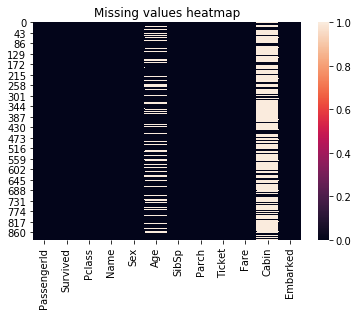

In [142]:
#Vishualize missing values in Dataset
sns.heatmap(titanic_data.isnull(), cbar = True).set_title("Missing values heatmap")

In [143]:
# Total num of unique values in each variable
titanic_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Data Imputation

### 1. Embarked

#### Filling Embarked with mode method

In [144]:
# Since ‘Embarked’ only had two missing values and the largest number of commuters embarked from Southampton, 
# the probability of boarding from Southampton is higher. So, we fill the missing values with Southampton.
titanic_data.Embarked.fillna(titanic_data.Embarked.mode()[0], inplace = True)

In [145]:
# Check Embarked missing value after "Data Imputaion" method applied.
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### 2. Age

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, We can assign them the mean age of the dataset. But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

In [146]:
#Categorized the people on the basis of their salutations.
#Extract Salutation from Name field  
titanic_data['Salutation'] = titanic_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

In [147]:
# Check extra coulmn "Salutation" added to the Dataset
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [148]:
# Check unique values in new column Salutation
print (titanic_data['Salutation'].unique())
print ("\n")
print ("Total number of unique values in ['Salutation']:", titanic_data['Salutation'].nunique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


Total number of unique values in ['Salutation']: 17


In [149]:
# Check counts of Salutation by Sex with Totals
pd.crosstab(titanic_data.Salutation,titanic_data.Sex, margins=True)

Sex,female,male,All
Salutation,,,
Capt,0,1,1
Col,0,2,2
Don,0,1,1
Dr,1,6,7
Jonkheer,0,1,1
Lady,1,0,1
Major,0,2,2
Master,0,40,40
Miss,182,0,182


In [150]:
# See the above table graphically
pd.crosstab(titanic_data.Salutation,titanic_data.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Salutation,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess,All
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1,314
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0,577
All,1,2,1,7,1,1,2,40,182,2,1,517,125,1,6,1,1,891


Okay so there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [151]:
titanic_data['Salutation'].replace(['Mlle','Mme','Ms','Lady','the Countess','Dr','Major','Capt','Sir','Don','Jonkheer','Col','Rev'],
                                   ['Miss','Miss','Miss','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'],inplace=True)

In [152]:
# Check counts of Salutation by Sex with Totals
pd.crosstab(titanic_data.Salutation,titanic_data.Sex, margins=True)

Sex,female,male,All
Salutation,,,
Master,0,40,40
Miss,186,0,186
Mr,1,528,529
Mrs,127,0,127
Other,0,9,9
All,314,577,891


In [153]:
# Re-check the above table again to see if changes are made correctly
pd.crosstab(titanic_data.Salutation,titanic_data.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Salutation,Master,Miss,Mr,Mrs,Other,All
Sex,,,,,,
female,0,186,1,127,0,314
male,40,0,528,0,9,577
All,40,186,529,127,9,891


There is still one female getting captured in Salutation "Mr", extract that row

In [154]:
# Get only that row which meets the condition above
titanic_data.loc[(titanic_data["Salutation"] == "Mr") & (titanic_data["Sex"] =='female')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Mr


In [155]:
# Change the value in 'Salutation' with index value = 796
titanic_data.at[796,'Salutation']= 'Mrs'

In [156]:
# Re-check the row changed with above method
titanic_data.loc[[796]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,Mrs


In [157]:
# Re-check the above table again to see if changes are made correctly
pd.crosstab(titanic_data.Salutation,titanic_data.Sex, margins=True).T.style.background_gradient(cmap='summer_r')

Salutation,Master,Miss,Mr,Mrs,Other,All
Sex,,,,,,
female,0,186,0,128,0,314
male,40,0,528,0,9,577
All,40,186,528,128,9,891


### Filling NaN values of Age with mean of each Salutation

In [158]:
# For Example look at the NaN value in Age of a sample row before applying the method to fill
titanic_data.loc[[5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr


In [159]:
#lets check the average age by Salutation first
titanic_data.groupby('Salutation')['Age'].mean()

Salutation
Master     4.574167
Miss      21.860000
Mr        32.699755
Mrs       36.099099
Other     45.888889
Name: Age, dtype: float64

In [160]:
## Assigning the NaN Values with the Cell values of the mean ages
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Salutation=='Master'),'Age'] = 5
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Salutation=='Miss'),'Age'] = 22
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Salutation=='Mr'),'Age'] = 33
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Salutation=='Mrs'),'Age'] = 36
titanic_data.loc[(titanic_data.Age.isnull())&(titanic_data.Salutation=='Other'),'Age'] = 46

In [161]:
# Re-check the example and look at the NaN value in Age of a sample row as seen above 
titanic_data.loc[[5]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr


In [162]:
# Check the dataset
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [163]:
#So no null values left finally in 'Age' column
titanic_data.Age.isnull().any() 

False

In [164]:
# Check Embarked missing value after "Data Imputaion" method.
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Salutation       0
dtype: int64

## Univariate Analysis

### 1. Survived

The first feature reported if a traveler lived or died. A comparison revealed that more than 60% of the passengers had died.

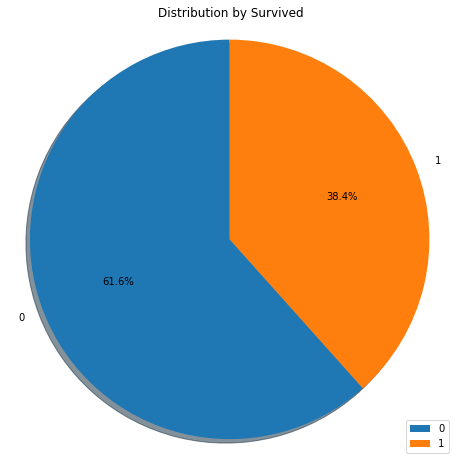

In [165]:
fig1,ax1 = plt.subplots(figsize=(8,8))
values= titanic_data['Survived'].value_counts().values.tolist()
labels= titanic_data['Survived'].value_counts().keys().tolist()
ax1.pie(values, labels= labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(labels, loc="lower right")
plt.title('Distribution by Survived')
plt.show()

In [166]:
#fig1, ax1 = plt.subplots()
#sns.barplot(x="Survived", y="Survived", data=titanic_data, estimator=lambda x: len(x) / len(titanic_data) * 100, orient='h')
#sns.set_style("whitegrid")
#sns.set_context(font_scale=2,rc={"font.size":15, "axes.labelsize":10})
#ax1.set_xlabel=("Percent")
#ax1.set_ylabel=("Suvived")
#plt.show()

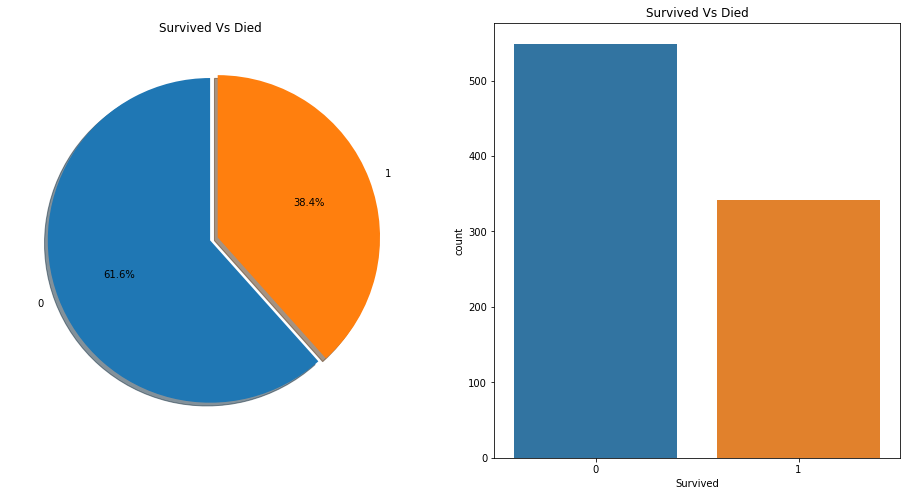

In [167]:
f,ax=plt.subplots(1,2,figsize=(16,8))
titanic_data['Survived'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True, startangle=90)
ax[0].set_title('Survived Vs Died')
ax[0].set_ylabel('')

sns.countplot('Survived',data=titanic_data,ax=ax[1])
ax[1].set_title('Survived Vs Died')
plt.show()

### 2. Pclass

The survival chances of a class-1 traveler were higher than a class-2 and class-3 traveler.

In [168]:
pd.crosstab(titanic_data.Pclass, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [169]:
print('Total Passengers in (PClass 1) are :', titanic_data['Pclass'].value_counts()[1])
print('Total Passengers in (PClass 2) are :', titanic_data['Pclass'].value_counts()[2])
print('Total Passengers in (PClass 3) are :', titanic_data['Pclass'].value_counts()[3])

Total Passengers in (PClass 1) are : 216
Total Passengers in (PClass 2) are : 184
Total Passengers in (PClass 3) are : 491


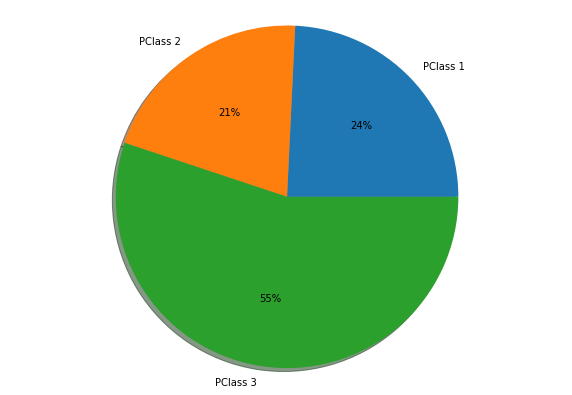

In [170]:
# Pie Chart of Passengers by PClass
labels = ['PClass 1', 'PClass 2', 'PClass 3']
sizes = [titanic_data['Pclass'].value_counts()[1],
        titanic_data['Pclass'].value_counts()[2],
        titanic_data['Pclass'].value_counts()[3]
        ]
# print(sizes) # adds up to 891, which is the total number of passengers
plt.figure(figsize=(10,7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', shadow=True)
plt.axis('equal')
plt.show()

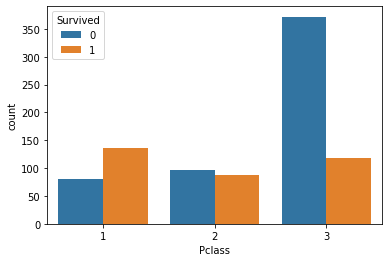

In [171]:
sns.countplot(x="Pclass", hue="Survived", data=titanic_data)

Passenger Class : Survival rate decreases with Pclass

In [172]:
print('% of Survival by PClass')

print('Total PClass 1 survived :', titanic_data.Survived[titanic_data.Pclass == 1].sum())

print('% of PClass 1 survived :', titanic_data.Survived[titanic_data.Pclass == 1].sum()/titanic_data[titanic_data.Pclass == 1].Survived.count() * 100)

print('Total PClass 2 survived :', titanic_data.Survived[titanic_data.Pclass == 2].sum())

print('% of PClass 2 survived :', titanic_data.Survived[titanic_data.Pclass == 2].sum()/titanic_data[titanic_data.Pclass == 2].Survived.count() * 100)

print('Total PClass 3 survived :', titanic_data.Survived[titanic_data.Pclass == 3].sum())

print('Total PClass 3 survived :', titanic_data.Survived[titanic_data.Pclass == 3].sum()/titanic_data[titanic_data.Pclass == 3].Survived.count() * 100)

% of Survival by PClass
Total PClass 1 survived : 136
% of PClass 1 survived : 62.96296296296296
Total PClass 2 survived : 87
% of PClass 2 survived : 47.28260869565217
Total PClass 3 survived : 119
Total PClass 3 survived : 24.236252545824847


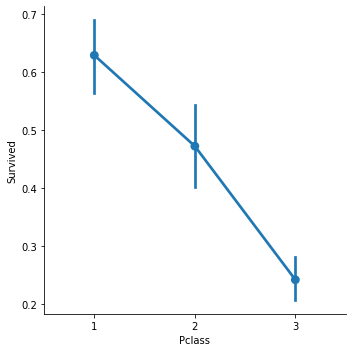

In [173]:
sns.catplot('Pclass','Survived', kind='point', data=titanic_data)

#### Passenger Class and Sex :
#### Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

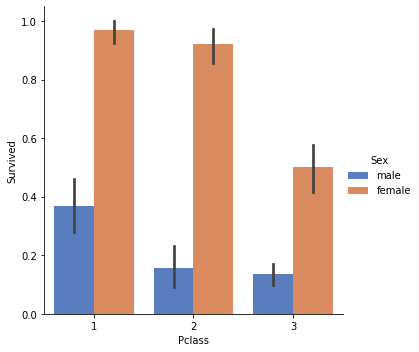

In [174]:
sns.factorplot("Pclass", "Survived", "Sex", data=titanic_data, kind="bar", palette="muted", legend=True)

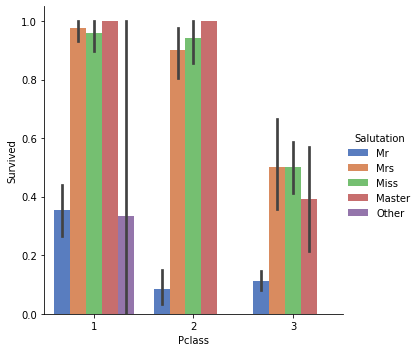

In [175]:
sns.factorplot("Pclass", "Survived", "Salutation", data=titanic_data, kind='bar', palette="muted", legend=True)

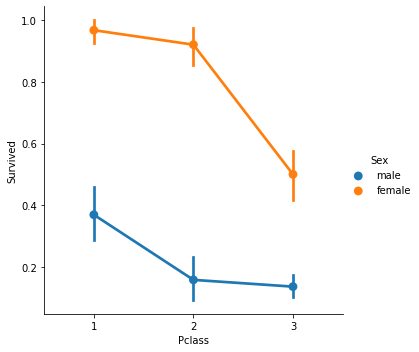

In [176]:
sns.catplot('Pclass','Survived',hue='Sex',kind='point',data=titanic_data)
plt.show()

### 3. Sex

In [177]:
titanic_data.groupby(['Sex'])['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [178]:
pd.crosstab(titanic_data.Sex, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [179]:
titanic_data.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

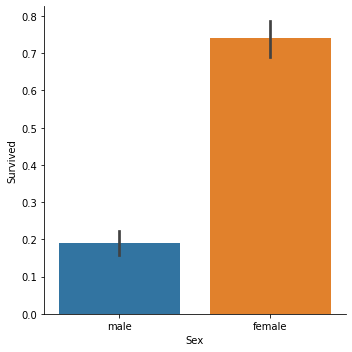

In [180]:
sns.catplot(x='Sex', y='Survived', kind='bar', data=titanic_data);

#### Female Passengers were survived more than Male Passengers

In [181]:
print (titanic_data['Sex'].value_counts())
print (titanic_data['Sex'].value_counts()/len(titanic_data) * 100)

male      577
female    314
Name: Sex, dtype: int64
male      64.758698
female    35.241302
Name: Sex, dtype: float64


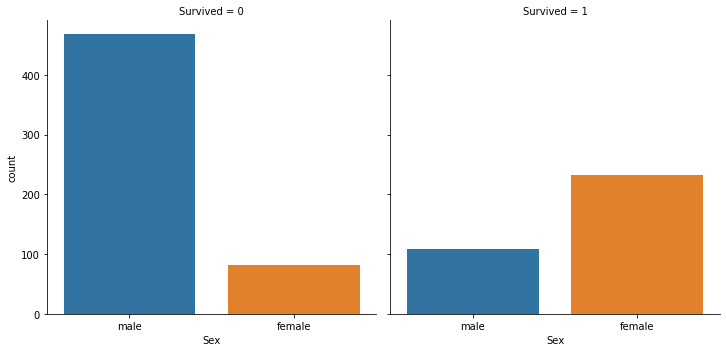

In [182]:
sns.catplot(x='Sex', col='Survived', kind='count', data=titanic_data);

Approximately 65% of the tourists were male while the remaining 35% were female.

#### More than 70% of FEMALE commuters survived, as compared to around 19% MALE commuters.

In [183]:
print('Total women survived :', titanic_data[titanic_data.Sex == 'female'].Survived.sum())

print('Total men survived :', titanic_data[titanic_data.Sex == 'male'].Survived.sum())

print('% of women survived :', titanic_data[titanic_data.Sex == 'female'].Survived.sum()/titanic_data[titanic_data.Sex == 'female'].Survived.count() * 100)

print('% of men survived :', titanic_data[titanic_data.Sex == 'male'].Survived.sum()/titanic_data[titanic_data.Sex == 'male'].Survived.count() * 100)

Total women survived : 233
Total men survived : 109
% of women survived : 74.20382165605095
% of men survived : 18.890814558058924


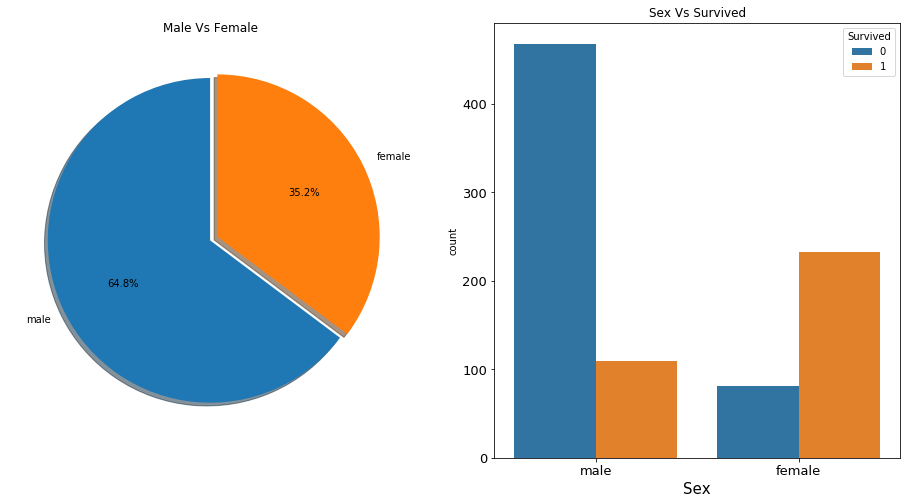

In [184]:
f,ax=plt.subplots(1,2,figsize=(16,8))
titanic_data['Sex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True, startangle=90)
ax[0].set_title('Male Vs Female')
ax[0].set_ylabel('')

sns.countplot('Sex', hue='Survived', data=titanic_data,ax=ax[1])
ax[1].set_title('Sex Vs Survived')
plt.xlabel('Sex',fontsize =15)
#plt.ylabel('Total',fontsize =15)
plt.xticks(fontsize =13)
plt.yticks(fontsize =13)

plt.show()

### 4. Age

In [185]:
print('The youngest passenger on board is:', round(titanic_data['Age'].min(),ndigits=2), 'months')
print('The oldest passenger on board is:', round(titanic_data['Age'].max(),ndigits=2), 'years')
print('The average age of passenger on board is:', round(titanic_data['Age'].mean(),ndigits=2), 'years')

The youngest passenger on board is: 0.42 months
The oldest passenger on board is: 80.0 years
The average age of passenger on board is: 29.84 years


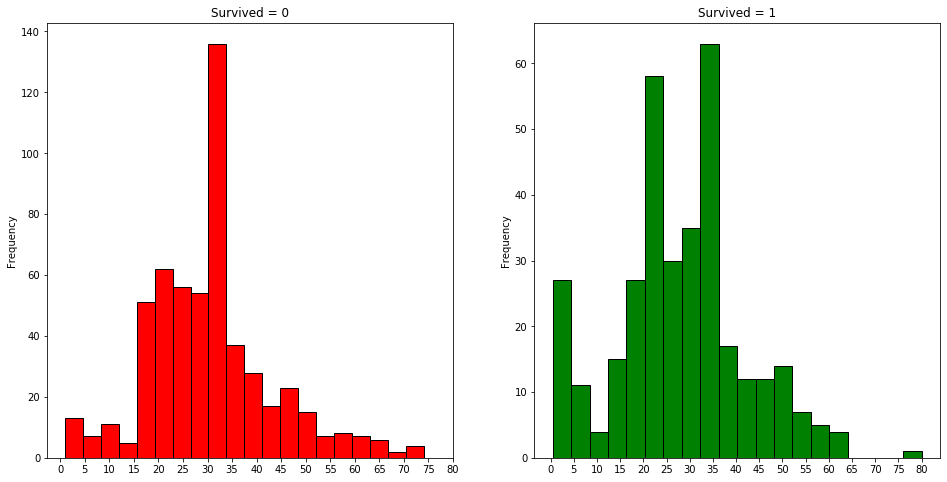

In [186]:
f, ax = plt.subplots(1,2,figsize=(16,8))

titanic_data[titanic_data['Survived']==0].Age.plot.hist(ax=ax[0], bins = 20, edgecolor='black', color = 'red')
ax[0].set_title('Survived = 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

titanic_data[titanic_data['Survived']==1].Age.plot.hist(ax=ax[1], bins = 20, edgecolor='black', color = 'green')
ax[1].set_title('Survived = 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

#### To check accuracy of the Age, we need to convert into bins

In [187]:
# Check Dataset before converting to bins for Age
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [188]:
#Converting to bins for Age
titanic_data['Age_bins'] = pd.cut(x=titanic_data['Age'], bins=[0,10,20,30,40,50,60,70,80,90])

In [189]:
#Check Age_bins column first 5 rows
titanic_data['Age_bins'].head(10)

0    (20, 30]
1    (30, 40]
2    (20, 30]
3    (30, 40]
4    (30, 40]
5    (30, 40]
6    (50, 60]
7     (0, 10]
8    (20, 30]
9    (10, 20]
Name: Age_bins, dtype: category
Categories (9, interval[int64]): [(0, 10] < (10, 20] < (20, 30] < (30, 40] ... (50, 60] < (60, 70] < (70, 80] < (80, 90]]

In [190]:
# Check Dataset after converting to bins for Age (Notice new column added as 'Age_bins')
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]"
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,"(30, 40]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,"(50, 60]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,"(0, 10]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,"(20, 30]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"(10, 20]"


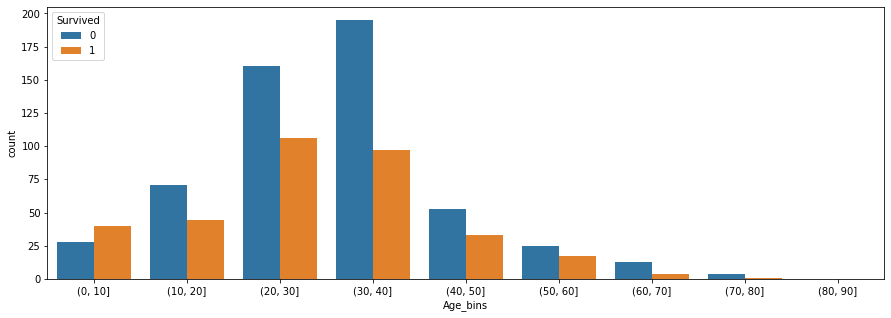

In [191]:
#Let's Plot the Age bins into bargraph
plt.figure(figsize=(15,5))
sns.countplot(x="Age_bins", hue="Survived", data=titanic_data)
#plt.legend(loc='upper right')
plt.show()

#### Most people died are in the  age group between '20-30' to '30-40'

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.

In [192]:
titanic_data.loc[titanic_data['Age'] <= 16, 'Age_band'] = 0
titanic_data.loc[(titanic_data['Age'] > 16) & (titanic_data['Age'] <=32), 'Age_band'] = 1
titanic_data.loc[(titanic_data['Age'] > 32) & (titanic_data['Age'] <=48), 'Age_band'] = 2
titanic_data.loc[(titanic_data['Age'] > 48) & (titanic_data['Age'] <=64), 'Age_band'] = 3
titanic_data.loc[titanic_data['Age'] > 64, 'Age_band'] = 4

In [193]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0


In [194]:
titanic_data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1.0,382
2.0,325
0.0,104
3.0,69
4.0,11


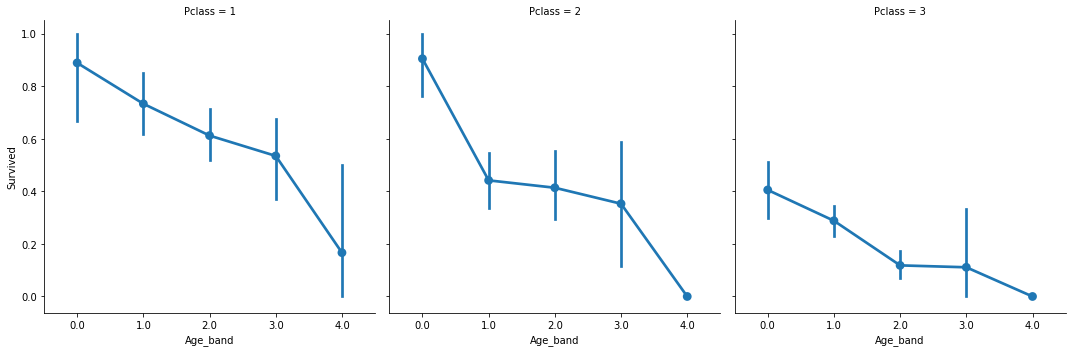

In [195]:
sns.factorplot('Age_band','Survived', data = titanic_data, col = 'Pclass')

#### True that..the survival rate decreases as the age increases irrespective of the Pclass.

In [196]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0


### 5. Sibsp

SibSp is the number of siblings or spouse of a person onboard. A maximum of 8 siblings and spouses traveled along with one of the traveler. 

#### Coverting Sibsp column into bins

In [197]:
# Check Dataset before converting to bins for Sibsp
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,"(30, 40]",2.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,"(50, 60]",3.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,"(0, 10]",0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,"(20, 30]",1.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"(10, 20]",0.0


In [198]:
titanic_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [199]:
#Converting to bins for Sibsp
titanic_data['Sibsp_bins'] = pd.cut(x=titanic_data['SibSp'], bins=[-0.1,0,1,2,3,4,5,6,7,8])

In [200]:
# Check the Dataset after applying Sibsp bins method
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]"
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,"(30, 40]",2.0,"(-0.1, 0.0]"
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,"(50, 60]",3.0,"(-0.1, 0.0]"
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,"(0, 10]",0.0,"(2.0, 3.0]"
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,"(20, 30]",1.0,"(-0.1, 0.0]"
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,"(10, 20]",0.0,"(0.0, 1.0]"


The chances of survival dropped drastically if someone traveled with more than 2 siblings or spouse.

In [201]:
pd.crosstab(titanic_data.SibSp, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


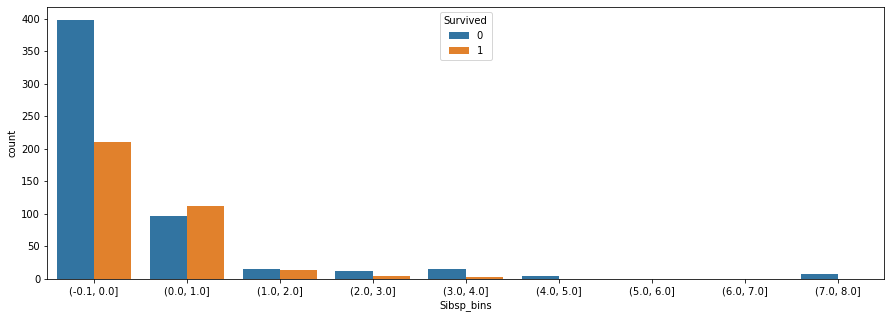

In [202]:
#Let's Plot the Age bins into bargraph
plt.figure(figsize=(15,5))
sns.countplot(x="Sibsp_bins", hue="Survived", data=titanic_data)
#plt.legend(loc='upper right')
plt.show()

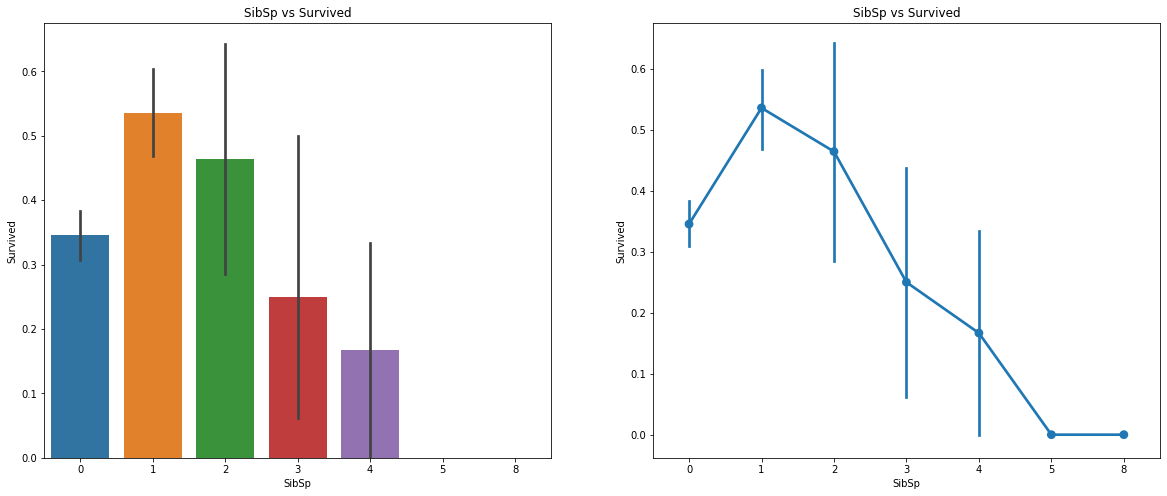

In [203]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived', data= titanic_data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived', data= titanic_data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

#### Passengers having 1 or less than 1 Sibling / Spouse had more survival chances

### 5. Parch

Same story with Parch Column

In [204]:
pd.crosstab(titanic_data.Parch, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


In [205]:
titanic_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [206]:
#Converting to bins for Parch
titanic_data['Parch_bins'] = pd.cut(x=titanic_data['Parch'], bins=[-0.1,0,1,2,3,4,5,6])

In [207]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]"


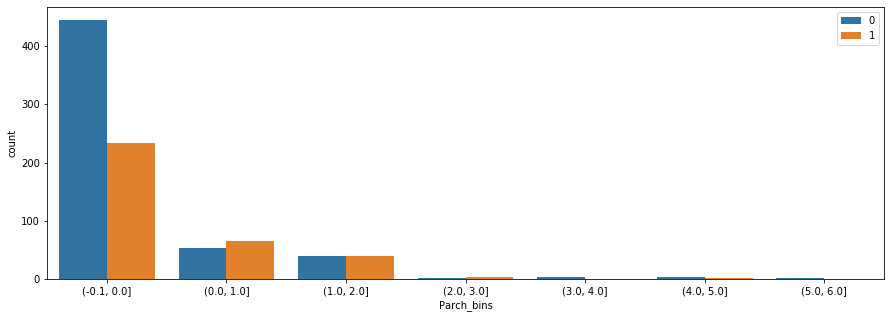

In [208]:
#Let's Plot the Age bins into bargraph
plt.figure(figsize=(15,5))
sns.countplot(x="Parch_bins", hue="Survived", data=titanic_data)
plt.legend(loc='upper right')
plt.show()

#### Passengers having 1 or less than 1 Parent / Child had more survival chances

I added the number of ‘Parch’ and ‘SibSp’ values to store in a new column named ‘Family’

In [209]:
# Check the Dataset before adding a new column
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]"


In [210]:
titanic_data['Family'] = titanic_data.Parch + titanic_data.SibSp

In [211]:
# Check Dataset after adding a new column 'Family' 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]",0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]",0


Created another column, 'Is_Alone' and assigned "True", if the value in ‘Family’ column was 0

In [212]:
titanic_data['Is_Alone'] = titanic_data.Family == 0

In [213]:
# Check Dataset after adding a new column 'Is_Alone' 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins,Family,Is_Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True


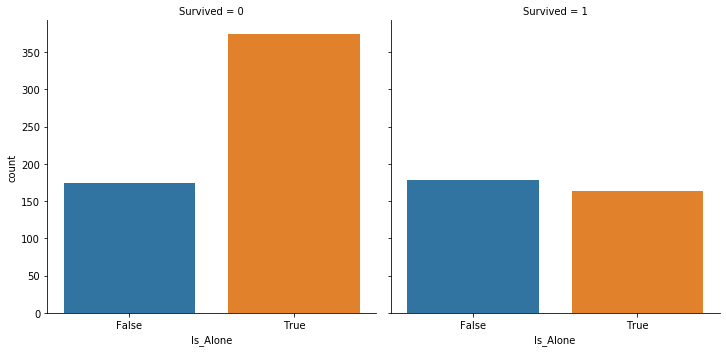

In [214]:
sns.catplot(x='Is_Alone', col='Survived', kind='count', data=titanic_data);

#### Chances of non survival skyrocketed when a traveler traveled alone.

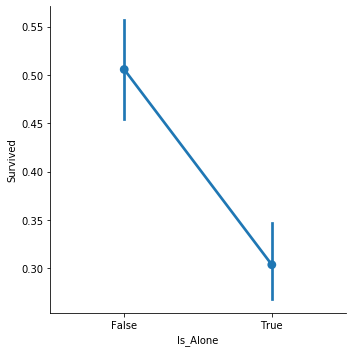

In [215]:
sns.catplot('Is_Alone','Survived', kind='point', data=titanic_data)

### 7. Fare

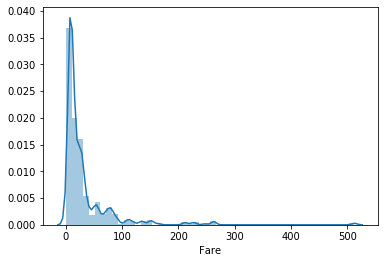

In [216]:
sns.distplot(titanic_data['Fare'])

In [217]:
print ('Passenger maximum fare paid :', titanic_data['Fare'].max())
print ('Passenger minimum fare paid :', titanic_data['Fare'].min())
print ('Passenger mid range fare paid :', titanic_data['Fare'].median())
print ('Passenger average fare paid :', titanic_data['Fare'].mean())

Passenger maximum fare paid : 512.3292
Passenger minimum fare paid : 0.0
Passenger mid range fare paid : 14.4542
Passenger average fare paid : 32.2042079685746


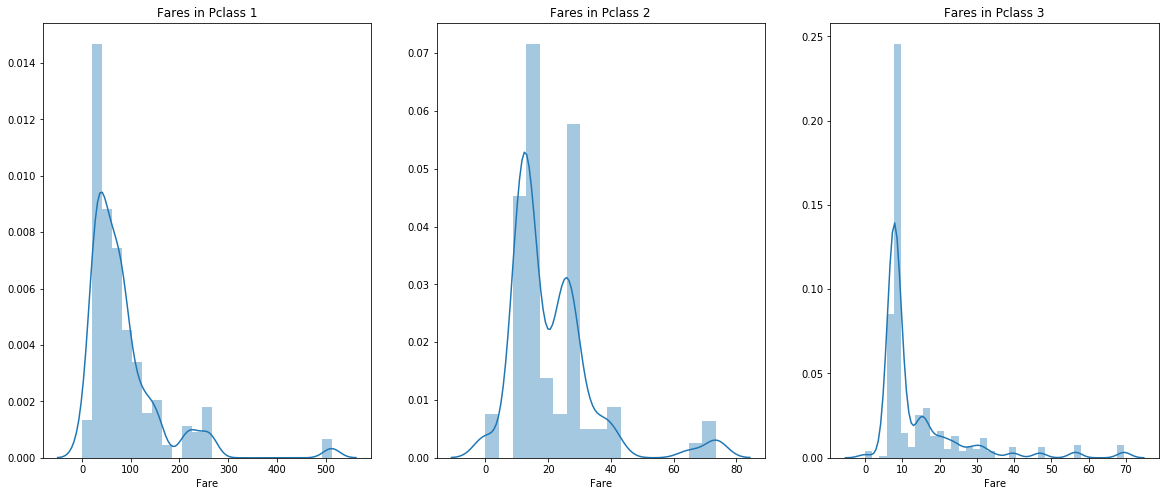

In [218]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(titanic_data[titanic_data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(titanic_data[titanic_data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(titanic_data[titanic_data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

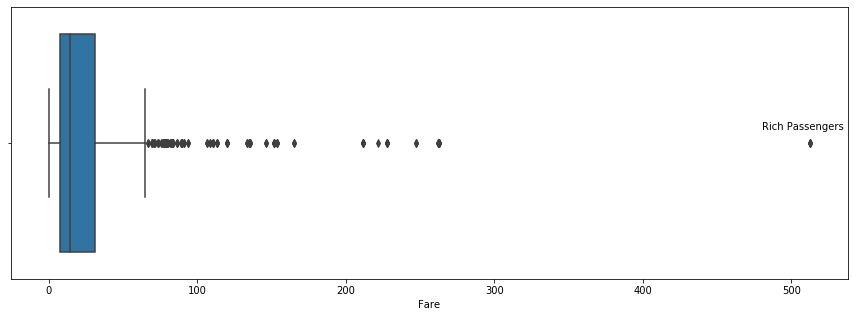

In [219]:
plt.figure(figsize=(15,5))
plt.annotate(s="Rich Passengers",xy=(512.3292,0),xytext=(480,-0.05))
sns.boxplot(x=titanic_data['Fare'])
plt.show()

### We can see one outlier [Very High] for some passengers

In [220]:
titanic_data['Fare'].quantile([0.1, 0.25, 0.5, 0.75])

0.10     7.5500
0.25     7.9104
0.50    14.4542
0.75    31.0000
Name: Fare, dtype: float64

In [221]:
Q1 = titanic_data['Fare'].quantile(0.25)
Q3 = titanic_data['Fare'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 is :',Q1)
print('Q3 is :',Q3)
print('IQR is :',IQR)

Q1 is : 7.9104
Q3 is : 31.0
IQR is : 23.0896


In [222]:
# Printing 'Fare' amount in lower limit with Outliers
print([titanic_data['Fare']] < (Q1 - 1.5 * IQR))

[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False 

In [223]:
# Printing 'Fare' amount in upper limit with Outliers
print([titanic_data['Fare']] > (Q3 + 1.5 * IQR))

[[False  True False False False False False False False False False False
  False False False False False False False False False False False False
  False False False  True False False False  True False False  True False
  False False False False False False False False False False False False
  False False False False  True False False False False False False False
  False  True  True False False False False False False False False False
   True False False False False False False False False False False False
  False False False False  True False False False False False False False
  False False False False False False  True False False False False False
  False False False False False False False False False False  True False
   True False False False  True False False False False False False False
  False False False False False False False  True False False False False
  False False False False False False False  True False False False False
  False False False  True False False 

By splitting the fare amount into four categories, it was obvious that there was a strong association between the charge and the survival. 

In [224]:
titanic_data['Fare_Category'] = pd.cut(titanic_data['Fare'], bins=[-0.5,0,8,15,32,120,515], labels=['Free_Pass','Low','Mid','High_Mid','High','Rich_Pass'])

In [225]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins,Family,Is_Alone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Mid


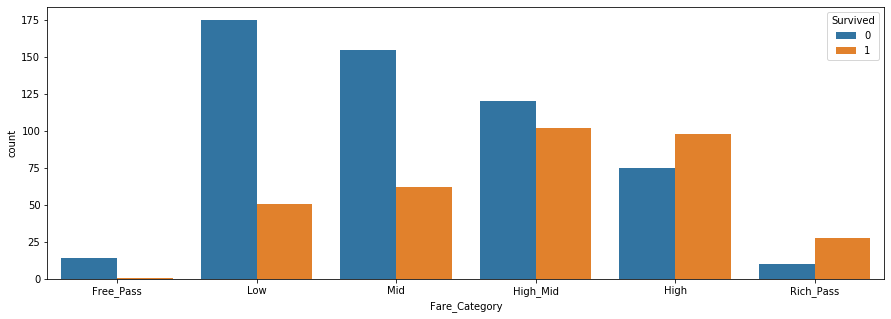

In [226]:
#Let's Plot the Age bins into bargraph
plt.figure(figsize=(15,5))
sns.countplot(x="Fare_Category", hue="Survived", data=titanic_data)
#plt.legend(loc='upper right')
plt.show()

#### The higher a tourist paid, the higher would be his chances to survive. 

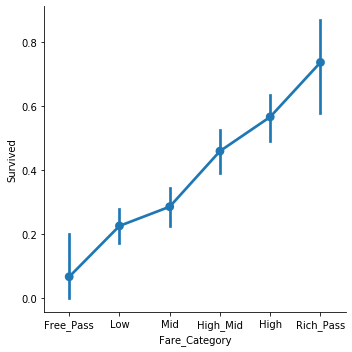

In [227]:
sns.factorplot('Fare_Category','Survived', kind='point', data=titanic_data)

Still Females were given more priorities who paid High

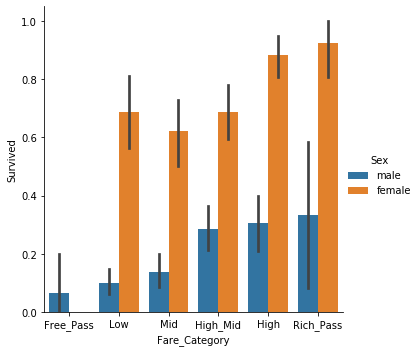

In [228]:
sns.catplot('Fare_Category','Survived', hue='Sex', kind='bar', data=titanic_data)

#### 8. Embarked

Embarked implies where the traveler mounted from. There are three possible values for Embark — Southampton, Cherbourg, and Queenstown.

In [229]:
titanic_data['Embarked'].replace(['S','C','Q'],
                                   ['Southampton','Cherbourg','Queenstown'],inplace=True)

In [230]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins,Family,Is_Alone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Mid


In [231]:
pd.crosstab(titanic_data.Embarked, titanic_data.Survived, margins=True).style.background_gradient(cmap='autumn_r')

Survived,0,1,All
Embarked,,,
Cherbourg,75,93,168
Queenstown,47,30,77
Southampton,427,219,646
All,549,342,891


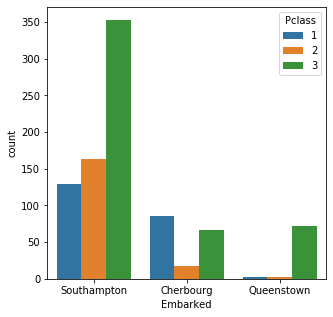

In [232]:
#Let's Plot the Age bins into bargraph
plt.figure(figsize=(5,5))
sns.countplot(x="Embarked", hue = 'Pclass', data=titanic_data)
plt.show()

#### The Embark Southamton looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass3 around 81% didn't survive.

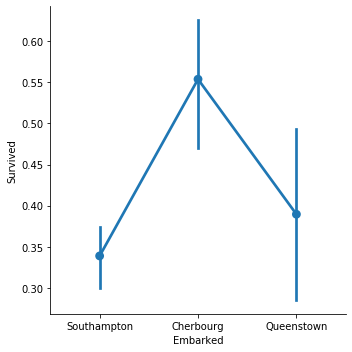

In [233]:
sns.catplot('Embarked','Survived', kind='point', data=titanic_data)

### Exporting Dataset with extra columns created

In [234]:
#titanic_data.to_csv('titanic_data_with_extra_columns.csv', index=False)

# Part 2: Data Wrangling

### Dropping UnNeeded Features

In [235]:
# Check the Dataset before removing unnecessary columns
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Age_bins,Age_band,Sibsp_bins,Parch_bins,Family,Is_Alone,Fare_Category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,Mr,"(20, 30]",1.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,Miss,"(20, 30]",1.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,Mrs,"(30, 40]",2.0,"(0.0, 1.0]","(-0.1, 0.0]",1,False,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,Mr,"(30, 40]",2.0,"(-0.1, 0.0]","(-0.1, 0.0]",0,True,Mid


In [236]:
#Let's drop not needed columns
titanic_data.drop(['PassengerId','Name','Age','Ticket','Fare','Cabin','Age_bins','Sibsp_bins','Parch_bins'], axis=1, inplace=True)

In [237]:
# Check the Dataset after removing unnecessary columns
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
0,0,3,male,1,0,Southampton,Mr,1.0,1,False,Low
1,1,1,female,1,0,Cherbourg,Mrs,2.0,1,False,High
2,1,3,female,0,0,Southampton,Miss,1.0,0,True,Low
3,1,1,female,1,0,Southampton,Mrs,2.0,1,False,High
4,0,3,male,0,0,Southampton,Mr,2.0,0,True,Mid


In [238]:
# Check the Dataset for their datatypes
titanic_data.dtypes

Survived            int64
Pclass              int64
Sex                object
SibSp               int64
Parch               int64
Embarked           object
Salutation         object
Age_band          float64
Family              int64
Is_Alone             bool
Fare_Category    category
dtype: object

### Converting String Values into Numeric

Since we cannot pass strings to a machine learning model, so we need to convert categorical features like Sex, Embarked,  Salutation, etc into numeric values.

In [239]:
#Check Dataset before changing categorical values into Numeric 
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
0,0,3,male,1,0,Southampton,Mr,1.0,1,False,Low
1,1,1,female,1,0,Cherbourg,Mrs,2.0,1,False,High
2,1,3,female,0,0,Southampton,Miss,1.0,0,True,Low
3,1,1,female,1,0,Southampton,Mrs,2.0,1,False,High
4,0,3,male,0,0,Southampton,Mr,2.0,0,True,Mid


In [240]:
# Import Libarary
from sklearn import preprocessing

In [241]:
LabelEncoder = preprocessing.LabelEncoder()

In [242]:
# Change numeric values for each columns
titanic_data['Sex'] = LabelEncoder.fit_transform(titanic_data['Sex'])
titanic_data['Embarked'] = LabelEncoder.fit_transform(titanic_data['Embarked'])
titanic_data['Salutation'] = LabelEncoder.fit_transform(titanic_data['Salutation'])
titanic_data['Is_Alone'] = LabelEncoder.fit_transform(titanic_data['Is_Alone'])
titanic_data['Fare_Category'] = LabelEncoder.fit_transform(titanic_data['Fare_Category'])

In [243]:
#Check Dataset after changing categorical values into Numeric 
titanic_data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
0,0,3,1,1,0,2,2,1.0,1,0,3
1,1,1,0,1,0,0,3,2.0,1,0,1
2,1,3,0,0,0,2,1,1.0,0,1,3
3,1,1,0,1,0,2,3,2.0,1,0,1
4,0,3,1,0,0,2,2,2.0,0,1,4


In [244]:
# Check the Dataset for their datatypes
titanic_data.dtypes

Survived           int64
Pclass             int64
Sex                int32
SibSp              int64
Parch              int64
Embarked           int32
Salutation         int32
Age_band         float64
Family             int64
Is_Alone           int64
Fare_Category      int32
dtype: object

### Observations in a Nutshell for all features:
##### (Sex) : The chance of survival for women is high as compared to men.

##### (Pclass) : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

##### (Age) : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

##### (Embarked) : This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.

##### (Parch+SibSp) : Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.

### Correlation Between The Features

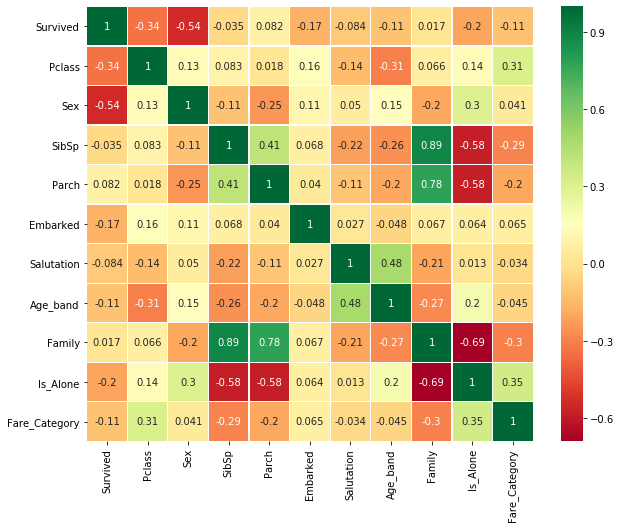

In [245]:
#data.corr()-->correlation matrix
sns.heatmap(titanic_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being "SibSp and Family_Size" and "Parch and Family_Size" and some negative ones like "Alone and Family_Size", "Survived and Sex".

# Part 3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whether a passenger will survive or die. So now we will predict the whether the Passenger will survive or not using some great Classification Algorithms.Following is the algorithm I will use to make the model:

 - Logistic Regression

### Import Machine Learning Library Packages

In [246]:
# Importing all necessary ML Packages
from sklearn.linear_model import LogisticRegression # logistic Regression
from sklearn.model_selection import train_test_split # Training and Testing Data Split
from sklearn import metrics # accuracy measure
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # All report Metrix

In [247]:
# Split the Datase
train, test = train_test_split(titanic_data, test_size=0.25, random_state=0,stratify=titanic_data['Survived'])
train_X = train[train.columns[1:]]
test_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_Y = train[train.columns[:1]]
X = titanic_data[titanic_data.columns[1:]]
Y = titanic_data['Survived']

In [248]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
0,3,1,1,0,2,2,1.0,1,0,3
1,1,0,1,0,0,3,2.0,1,0,1
2,3,0,0,0,2,1,1.0,0,1,3
3,1,0,1,0,2,3,2.0,1,0,1
4,3,1,0,0,2,2,2.0,0,1,4


In [249]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [250]:
train_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
671,1,1,1,0,2,2,1.0,1,0,1
417,2,0,0,2,2,1,1.0,2,0,4
634,3,0,3,2,2,1,0.0,5,0,2
323,2,0,1,1,2,3,1.0,2,0,2
379,3,1,0,0,2,2,1.0,0,1,3


In [251]:
train_Y.head()

,Survived
671,0
417,1
634,0
323,1
379,0


In [252]:
test_X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Salutation,Age_band,Family,Is_Alone,Fare_Category
671,1,1,1,0,2,2,1.0,1,0,1
417,2,0,0,2,2,1,1.0,2,0,4
634,3,0,3,2,2,1,0.0,5,0,2
323,2,0,1,1,2,3,1.0,2,0,2
379,3,1,0,0,2,2,1.0,0,1,3


In [253]:
test_Y.head()

,Survived
671,0
417,1
634,0
323,1
379,0


### Logistic Regression

In [254]:
log_model = LogisticRegression()
log_model.fit(train_X,train_Y)
log_prediction = log_model.predict(test_X)
print('The accuracy of the Logistic Regression is :', metrics.accuracy_score(log_prediction, test_Y))

The accuracy of the Logistic Regression is : 0.8068862275449101


In [255]:
print(confusion_matrix(test_Y,log_prediction))

[[364  48]
 [ 81 175]]


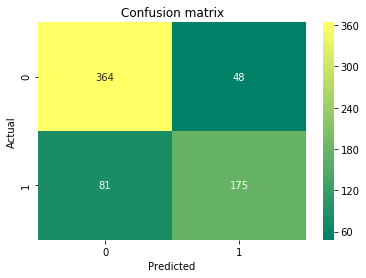

In [256]:
# See the confusion Merics graphicailly
sns.heatmap(confusion_matrix(test_Y,log_prediction), cmap='summer',annot=True,fmt='2.0f')
plt.title('Confusion matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [257]:
#The precision is the ratio tp / (tp + fp) [175/(175+48)] 
metrics.precision_score(test_Y,log_prediction)

0.7847533632286996

In [258]:
#The recall is the ratio tp / (tp + fn) 175/(175+81))
metrics.recall_score(test_Y,log_prediction)

0.68359375

In [259]:
#let's Check the accuracy 
metrics.accuracy_score(test_Y,log_prediction)

0.8068862275449101

In [260]:
# Let'see them in Summary Table
print(classification_report(test_Y,log_prediction))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       412
           1       0.78      0.68      0.73       256

    accuracy                           0.81       668
   macro avg       0.80      0.78      0.79       668
weighted avg       0.81      0.81      0.80       668



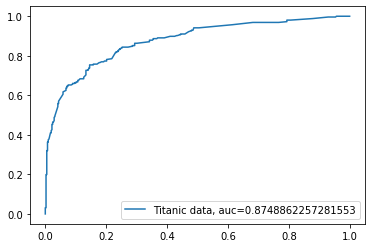

In [261]:
log_prediction_proba = log_model.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_Y, log_prediction_proba)
auc = metrics.roc_auc_score(test_Y, log_prediction_proba)
plt.plot(fpr,tpr,label="Titanic data, auc="+str(auc))
plt.legend(loc=4)
plt.show()